# Data exploration and Analysis

In [1220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load libraries for data handling and visualization

In [1221]:
df = pd.read_csv('synthetic_loan_data.csv')
df

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,bdcfc42b-8122-41db-aa6a-58b294568b74,Jose Torres,22,Female,Divorced,Other,Student,178359,48541,Education,363,2,8,Yes
8996,a874d557-cd0e-4708-acbf-81d4b1720b65,Michael Butler,26,Female,Widowed,Other,Self-employed,126938,33411,Education,379,4,7,Yes
8997,8a4f48b2-d251-43ad-880b-dbd7657050ee,Veronica Avila,19,Male,Married,PhD,Student,119957,47023,Car,693,2,6,Yes
8998,8d5af123-085d-47e6-872c-5869d4c933f2,Kayla Miller,51,Female,Married,PhD,Retired,160226,31385,Personal,649,4,7,No


Load dataset to read its content

In [1222]:
print(df.shape)
print(df.info())
print(df.describe())

(9000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            9000 non-null   object
 1   Name                  9000 non-null   object
 2   Age                   9000 non-null   int64 
 3   Gender                9000 non-null   object
 4   MaritalStatus         9000 non-null   object
 5   EducationLevel        9000 non-null   object
 6   EmploymentStatus      9000 non-null   object
 7   AnnualIncome          9000 non-null   int64 
 8   LoanAmountRequested   9000 non-null   int64 
 9   PurposeOfLoan         9000 non-null   object
 10  CreditScore           9000 non-null   int64 
 11  ExistingLoansCount    9000 non-null   int64 
 12  LatePaymentsLastYear  9000 non-null   int64 
 13  LoanApproved          9000 non-null   object
dtypes: int64(6), object(8)
memory usage: 984.5+ KB
None
               Age   Annu

Checks the number of rows and columns, nulls and statistical summary of data

In [1223]:
df = df.drop(["CustomerID", "Name"], axis=1)

Dropping unecessary columns cleans the data as they add no value to prediction, the redundant columns will cause noise to the model which can cause overfitting and data leakage.

In [1224]:
print(df.isnull().sum())

Age                     0
Gender                  0
MaritalStatus           0
EducationLevel          0
EmploymentStatus        0
AnnualIncome            0
LoanAmountRequested     0
PurposeOfLoan           0
CreditScore             0
ExistingLoansCount      0
LatePaymentsLastYear    0
LoanApproved            0
dtype: int64


Checks for columns with missing data for cleaning, since there is no missing data, dataset is clean.

In [1225]:
print("Checking for unrealistic values:")

unrealistic_age = df[(df['Age'] < 18) | (df['Age'] > 100)]
print(f"Rows with unrealistic Age: {len(unrealistic_age)}")

unrealistic_income = df[(df['AnnualIncome'] <= 0) | (df['AnnualIncome'] > 1_000_000)]
print(f"Rows with unrealistic AnnualIncome: {len(unrealistic_income)}")

unrealistic_loan = df[(df['LoanAmountRequested'] <= 0) | (df['LoanAmountRequested'] > 1_000_000)]
print(f"Rows with unrealistic LoanAmountRequested: {len(unrealistic_loan)}")

if 'CreditScore' in df.columns:
    unrealistic_credit = df[(df['CreditScore'] < 300) | (df['CreditScore'] > 850)]
    print(f"Rows with unrealistic CreditScore: {len(unrealistic_credit)}")

if 'ExistingLoansCount' in df.columns:
    unrealistic_loans = df[(df['ExistingLoansCount'] < 0) | (df['ExistingLoansCount'] > 50)]
    print(f"Rows with unrealistic ExistingLoansCount: {len(unrealistic_loans)}")

if 'LatePaymentsLastYear' in df.columns:
    unrealistic_late = df[(df['LatePaymentsLastYear'] < 0) | (df['LatePaymentsLastYear'] > 20)]
    print(f"Rows with unrealistic LatePaymentsLastYear: {len(unrealistic_late)}")

Checking for unrealistic values:
Rows with unrealistic Age: 0
Rows with unrealistic AnnualIncome: 0
Rows with unrealistic LoanAmountRequested: 0
Rows with unrealistic CreditScore: 0
Rows with unrealistic ExistingLoansCount: 0
Rows with unrealistic LatePaymentsLastYear: 0


Checks for any unrealistic values such as negative income.

In [1226]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
MaritalStatus: ['Divorced' 'Married' 'Single' 'Widowed']
EducationLevel: ['Other' 'Bachelor' 'High School' 'PhD' 'Master']
EmploymentStatus: ['Employed' 'Self-employed' 'Unemployed' 'Retired' 'Student']
PurposeOfLoan: ['Personal' 'Home' 'Education' 'Car' 'Business']
LoanApproved: ['Yes' 'No']


Checks for categories that may need to be encoded later on for the model to learn from

In [1227]:
df['AnnualIncome'] = pd.to_numeric(df['AnnualIncome'], errors='coerce')
df['LoanAmountRequested'] = pd.to_numeric(df['LoanAmountRequested'], errors='coerce')

df['Loan_to_Income'] = df['LoanAmountRequested'] / (df['AnnualIncome'] + 1)

df[['LoanAmountRequested', 'AnnualIncome', 'Loan_to_Income']].head()

df['Debt_to_Income'] = df['ExistingLoansCount'] * df['LoanAmountRequested'] / df['AnnualIncome']

df['Loan_to_Income'].fillna(df['Loan_to_Income'].median(), inplace=True)
df['Debt_to_Income'].fillna(df['Debt_to_Income'].median(), inplace=True)

C:\Users\chaya\AppData\Local\Temp\ipykernel_20016\3182789433.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_to_Income'].fillna(df['Loan_to_Income'].median(), inplace=True)
C:\Users\chaya\AppData\Local\Temp\ipykernel_20016\3182789433.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Ensures loan and income are numeric, create a new ratio feature with 'Loan_to_Income' and 'Debt_to_Income' as they are important financial ratio that could help with predicting someones risk assesment when loaning and filling any null value with the median helps maintain data integrity. The above can improve the model performance by providing more insightful information.

LoanApproved
Yes    6303
No     2697
Name: count, dtype: int64

Percentage distribution:
LoanApproved
Yes    70.03%
No     29.97%
Name: proportion, dtype: object


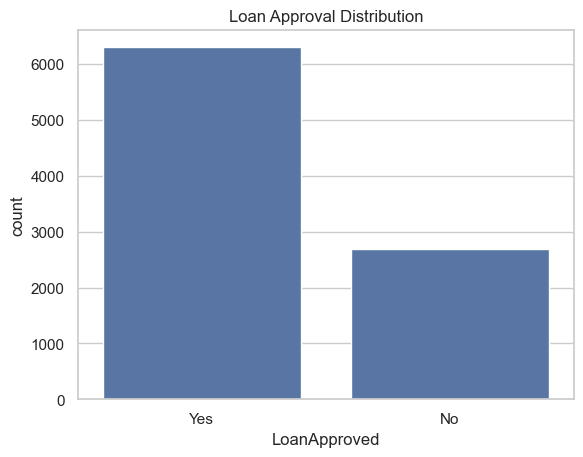

In [1228]:
print(df['LoanApproved'].value_counts())
print("\nPercentage distribution:")
print((df['LoanApproved'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

sns.countplot(x='LoanApproved', data=df)
plt.title('Loan Approval Distribution')
plt.show()

This boxplot checks for class imbalance and plot distribution.
70% of loans are approved which is quite imbalanced.

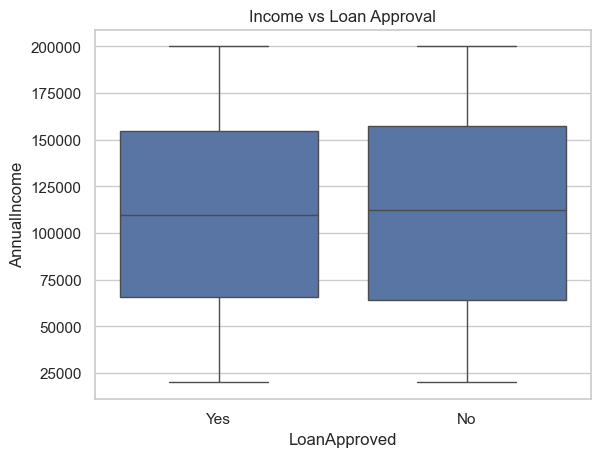

In [1229]:
sns.boxplot(x='LoanApproved', y='AnnualIncome', data=df)
plt.title('Income vs Loan Approval')
plt.show()

The boxplot visualizes the distribution of applicants' annual income according to loan approval status as income has a higher chance of affecting loan approval realistically.
This helps to compare the income levels of approved vs not approved applicants.
By visualizing this, we can see if income is a strong predictor for loan approval.
If the median or spread of income is much higher for approved loans, it suggests income is an important feature for approval decisions. However in this case, there are no distinct median or spread, which suggests that it is not a very important feature.

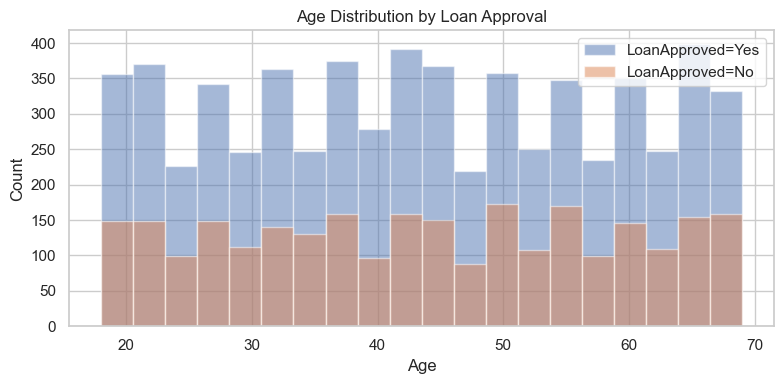

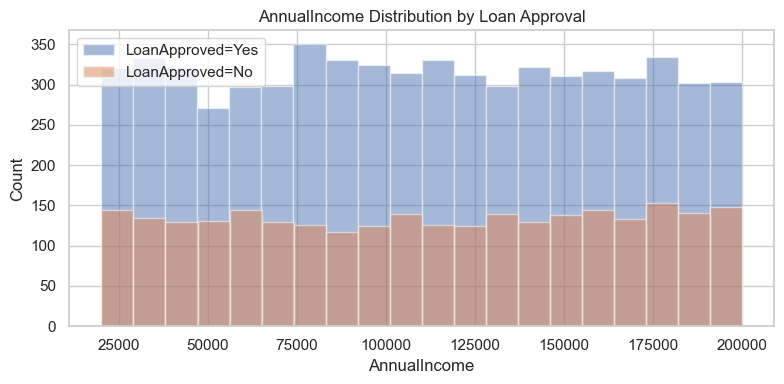

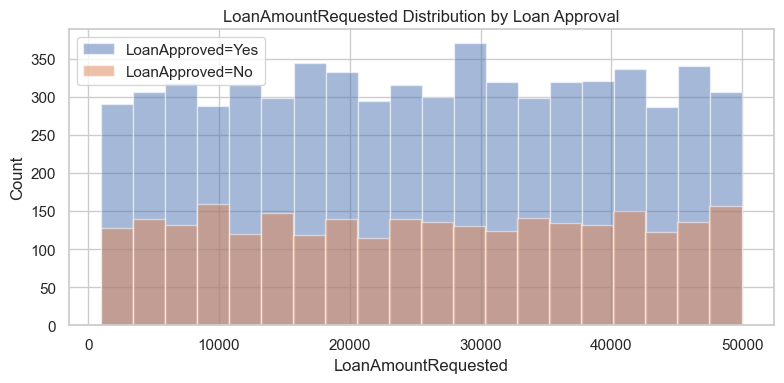

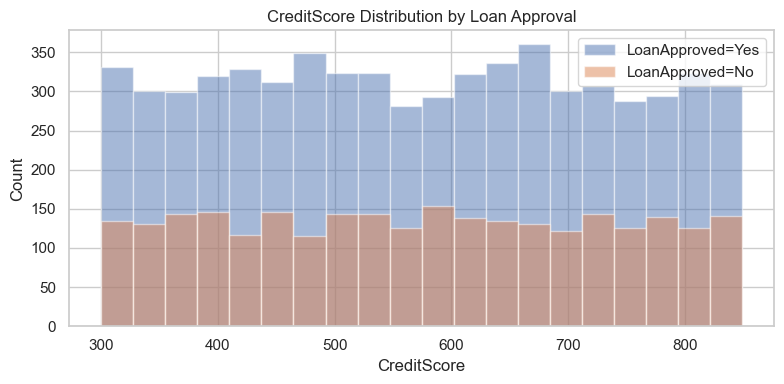

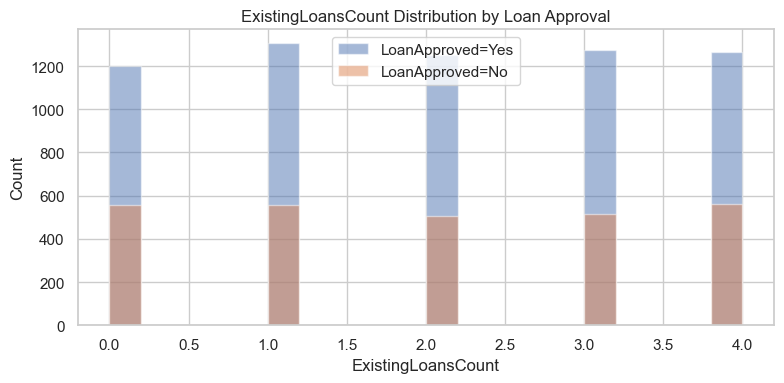

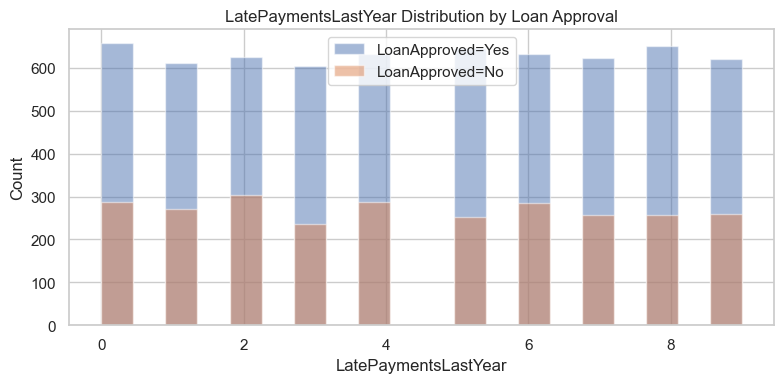

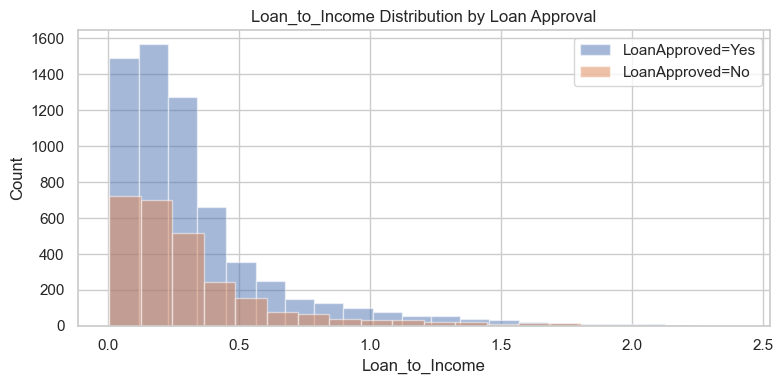

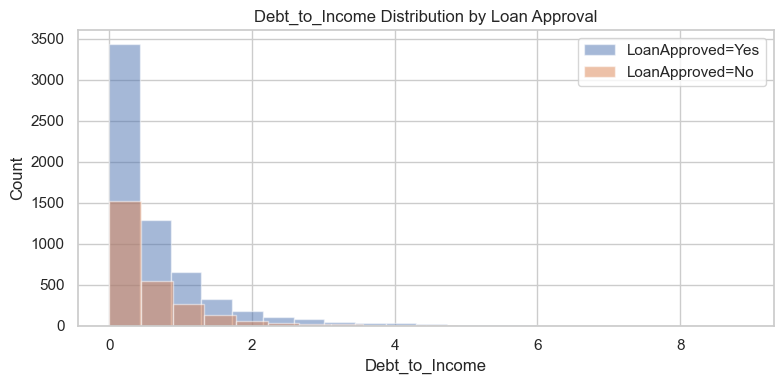

In [1230]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    for status in df['LoanApproved'].unique():
        subset = df[df['LoanApproved'] == status]
        plt.hist(subset[col], bins=20, alpha=0.5, label=f'LoanApproved={status}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution by Loan Approval')
    plt.legend()
    plt.tight_layout()
    plt.show()

Plots numeric values to loan approval status and checks for outliers.
This helps visually when comparing how each feature differ from the loan approval status and which feature may be important. However, no clear features are seen that affect approval.

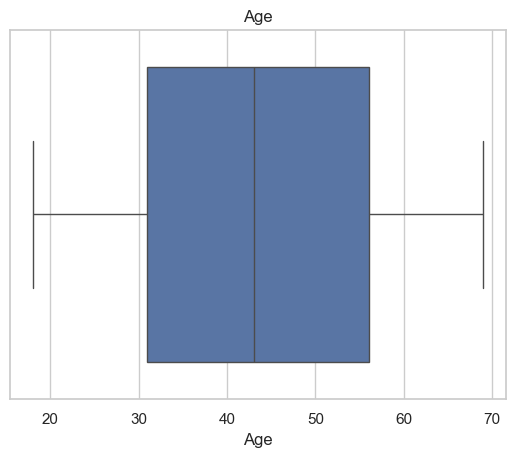

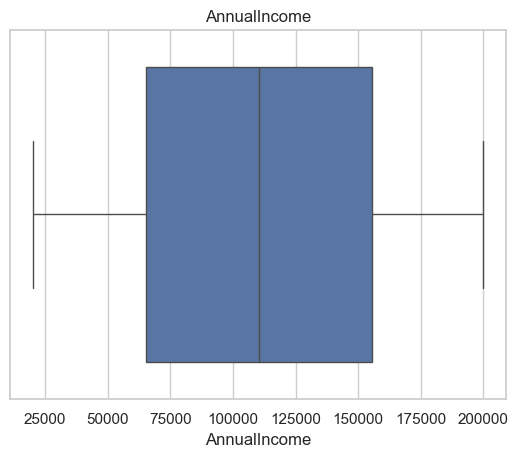

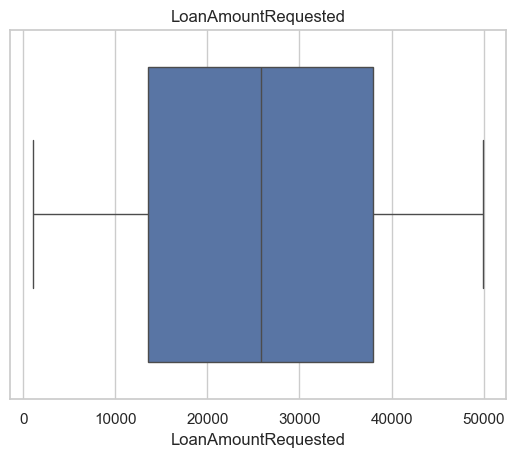

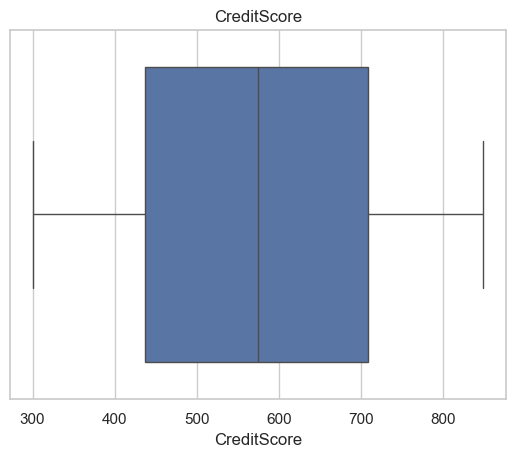

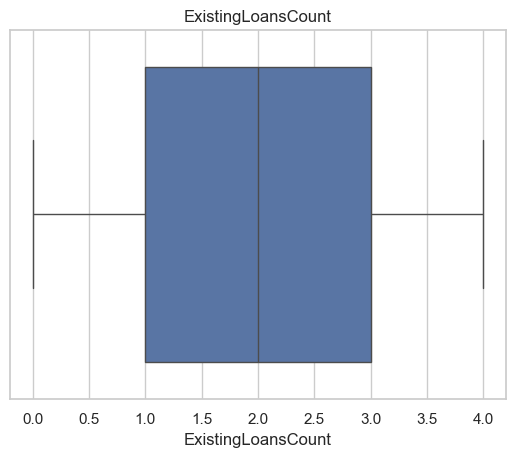

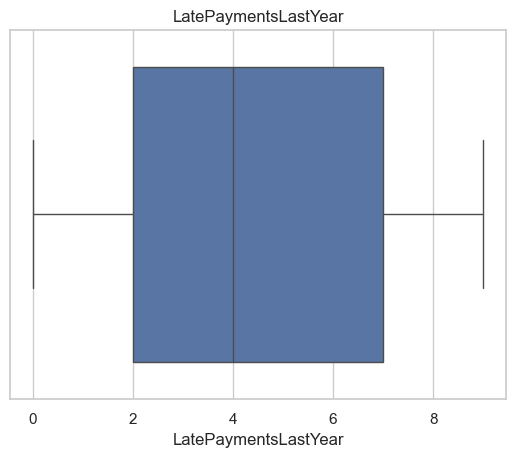

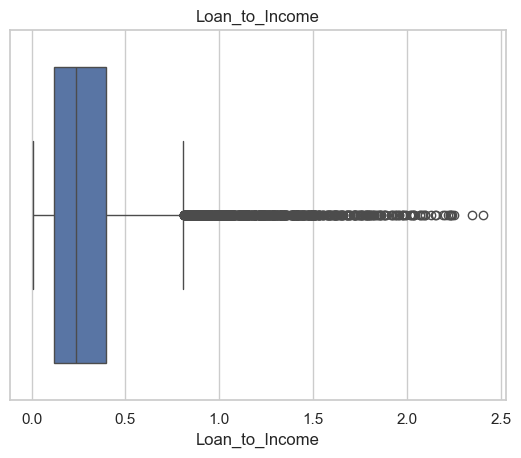

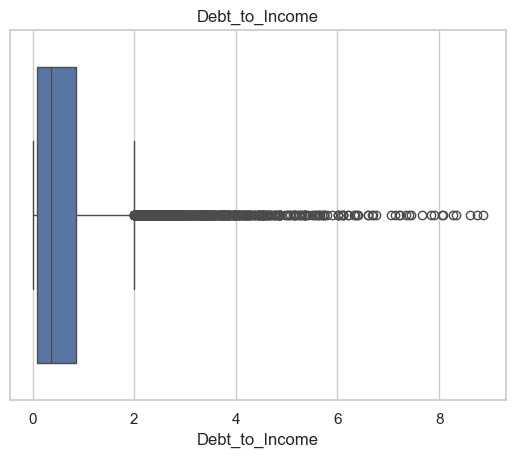

In [1231]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

This boxplot is a visual check for which numeric feature differ most by outcome.
The boxplot above shows the distribution of the Loan_to_Income ratio for everyone.
Most values are concentrated below 0.5, suggesting that the majority of people request for loans that are less than half their income.
There are a significant number of outliers above 1.0, meaning some people request loans that exceed their income.
The presence of these outliers suggests that the Loan_to_Income ratio could be an important feature for identifying risky loan applications.

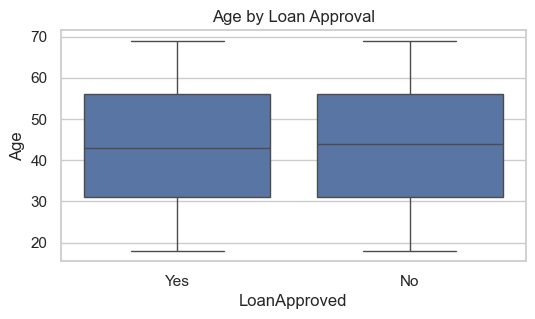

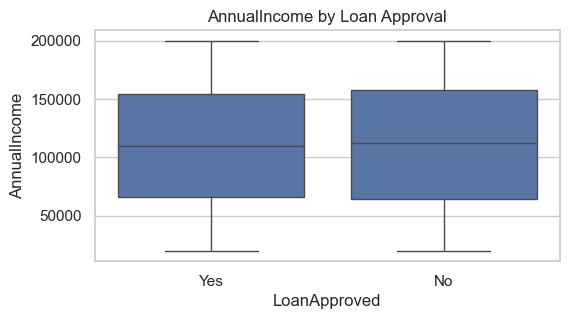

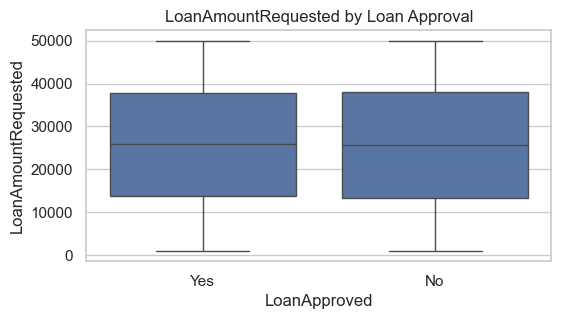

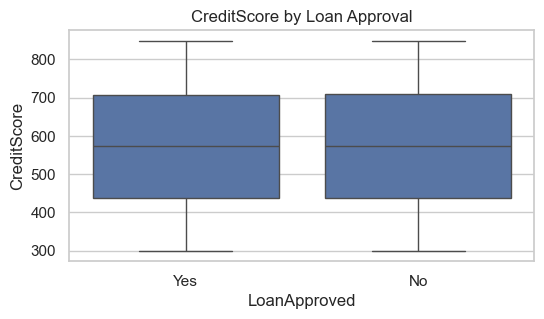

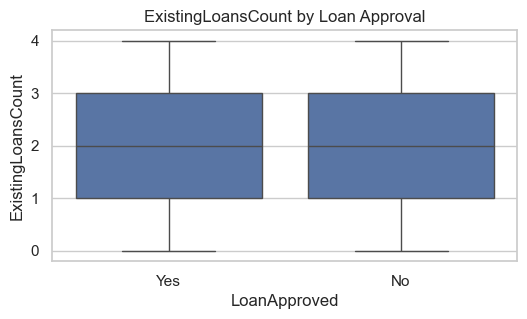

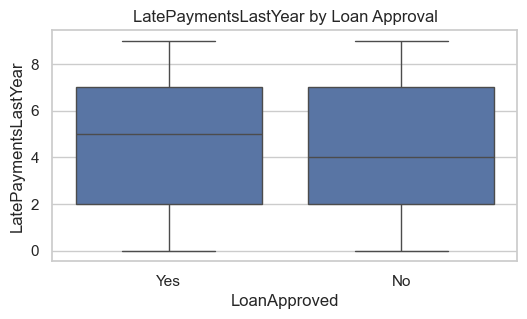

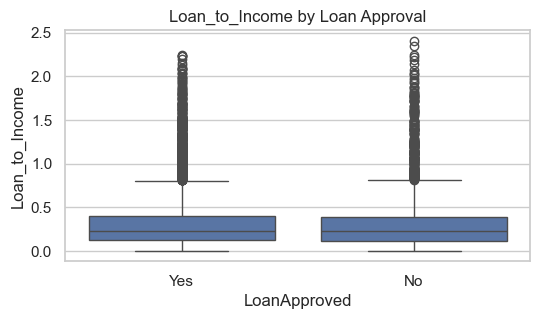

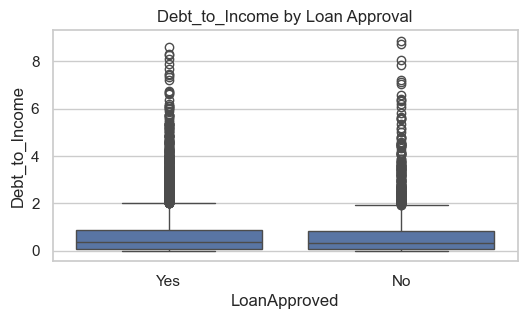

In [1232]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='LoanApproved', y=col, data=df)
    plt.title(f'{col} by Loan Approval')
    plt.show()

This boxplot helps visualise and identify distributions to spot outliers. If the feature median or spread differs largely from loan approval status, it can suggest that it is a important feature but from the boxplot we can see that there is largely no such feature. However, there is a feature 'LatePaymentsLastYear' whereby its median is at a 5 for approved loans while its median at 4 for not approved loans. So this feature can be taken into consideration that it might be a important feature needed for the model performance.

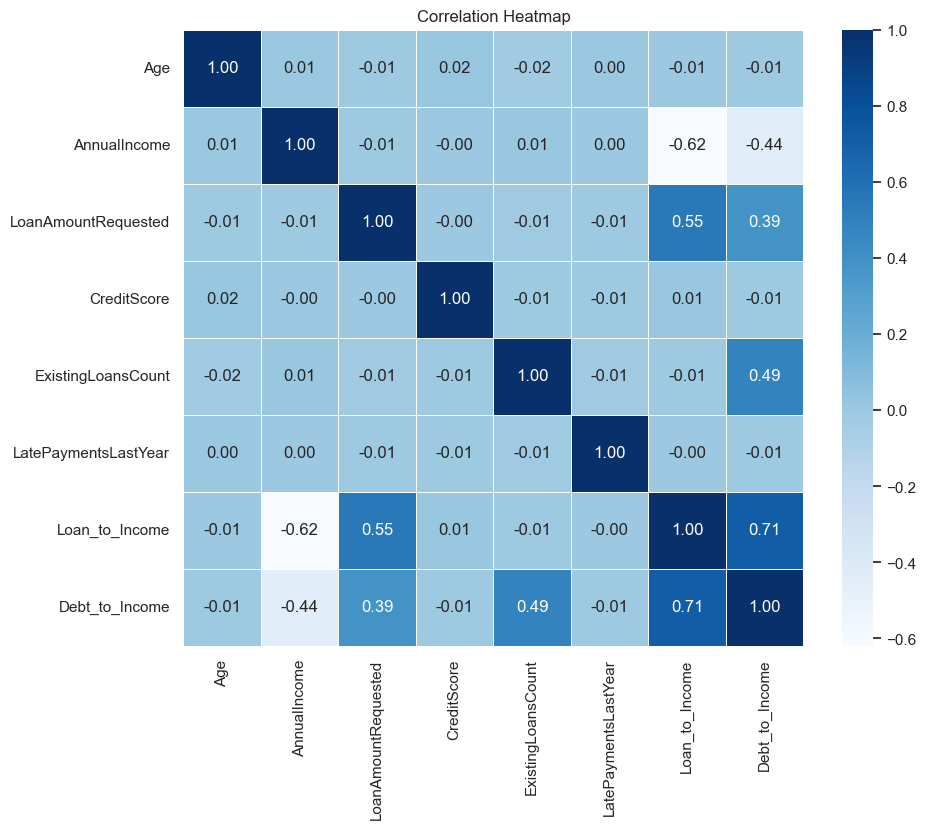

In [1233]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows there is a strong correlation between LoanAmountRequested and Loan_to_Income while a weak correlation of CreditScore with others.
AnnualIncome to Loan_to_Income_ratio (-0.62). As income increases, the loan-to-income ratio decreases, indicating better affordability.
LoanAmountRequested to Loan_to_Income_ratio (0.55): This moderate positive correlation shows that larger loan requests naturally lead to higher debt-to-income ratios.
CreditScore shows almost no correlation with other variables (all are near 0.00). Age has minimal relationships with financial variables and LatePaymentsLastYear does not correlate strongly with any other features.

In [1234]:
print(df.groupby('LoanApproved').mean(numeric_only=True))

for col in categorical_cols:
    if col != 'LoanApproved':
        print(df.groupby(col)['LoanApproved'].value_counts(normalize=True))

                    Age   AnnualIncome  LoanAmountRequested  CreditScore  \
LoanApproved                                                               
No            43.701149  111281.496478         25634.187616   573.768632   
Yes           43.485959  109851.194828         25700.435666   572.947168   

              ExistingLoansCount  LatePaymentsLastYear  Loan_to_Income  \
LoanApproved                                                             
No                      1.989989              4.412310        0.332043   
Yes                     2.016341              4.502459        0.329374   

              Debt_to_Income  
LoanApproved                  
No                  0.645897  
Yes                 0.662794  
Gender  LoanApproved
Female  Yes             0.707219
        No              0.292781
Male    Yes             0.693484
        No              0.306516
Name: proportion, dtype: float64
MaritalStatus  LoanApproved
Divorced       Yes             0.691189
               No   

This table helps see proportion of loan approvals within each category and compares the average values of each features which could help determine its importance.

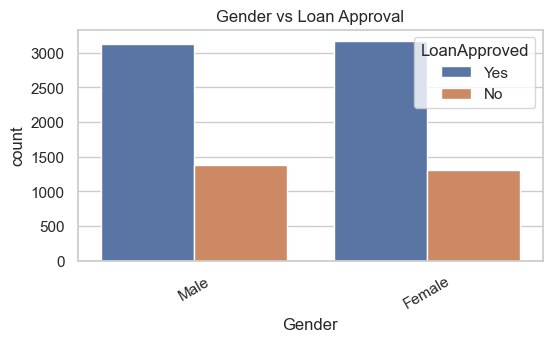

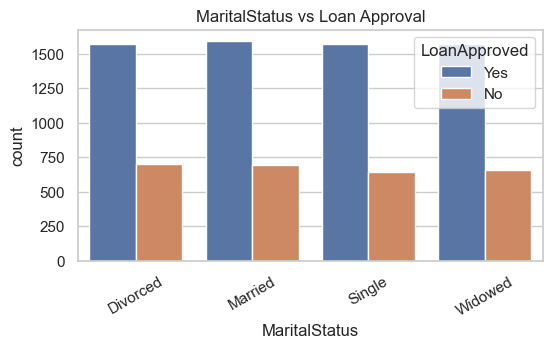

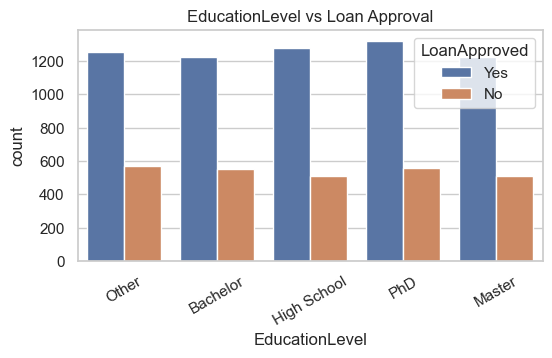

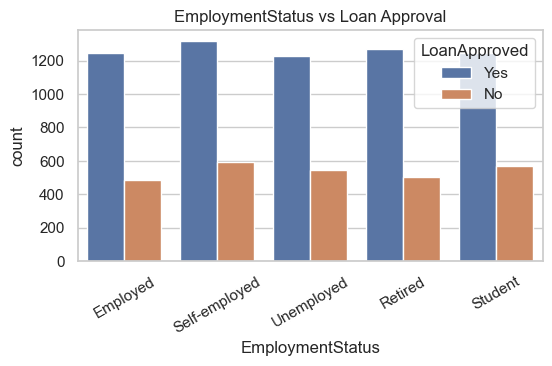

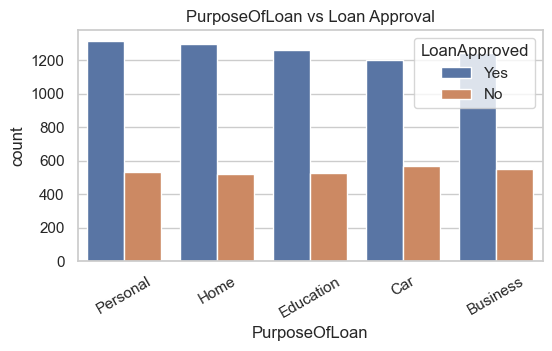

In [1235]:
cat_cols = [col for col in categorical_cols if col != 'LoanApproved']
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='LoanApproved', data=df)
    plt.title(f'{col} vs Loan Approval')
    plt.xticks(rotation=30)
    plt.show()

This bar graph helps visualise relationship between categorical features and loan approval and compares approval rates within each category which can possibly show some trends or insights on feature selection/importance.

Easy visualisation to check for class imbalance, it is important as class imbalance can affect the model performance negatively, causing data leakage/overfitting/biases.

# Model building

## Data preprocessing

In [1236]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [1237]:
df["LoanApproved_Yes"] = df["LoanApproved"].map({"Yes": 1, "No": 0})

target = df["LoanApproved_Yes"]
features = df.drop(["LoanApproved", "LoanApproved_Yes"], axis=1)

features_encoded = pd.get_dummies(features, drop_first=True)

df_encoded_full = pd.concat([features_encoded, target], axis=1)

OHE is performed to convert categorical feature 'LoanApproved' to numeric to be used later on in model training.

In [1238]:
print(f"Total rows: {len(df_encoded_full)}")
print("Class distribution:")
print(df_encoded_full['LoanApproved_Yes'].value_counts())
print("\nPercentage distribution:")
print((df['LoanApproved'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

Total rows: 9000
Class distribution:
LoanApproved_Yes
1    6303
0    2697
Name: count, dtype: int64

Percentage distribution:
LoanApproved
Yes    70.03%
No     29.97%
Name: proportion, dtype: object


In [1239]:
from sklearn.preprocessing import StandardScaler

feature_cols = [c for c in df_encoded_full.columns if c != "LoanApproved_Yes"]

scaler = StandardScaler()
df_encoded_full[feature_cols] = scaler.fit_transform(df_encoded_full[feature_cols])


In [1240]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
anomaly_features = df_encoded_full.drop("LoanApproved_Yes", axis=1)
df_encoded_full['anomaly'] = iso.fit_predict(anomaly_features)

anomalies_detected = (df_encoded_full['anomaly'] == -1).sum()
normal_data = (df_encoded_full['anomaly'] == 1).sum()
print(f"Anomalies detected: {(df_encoded_full['anomaly'] == -1).sum()}")
print(f"Normal data points: {(df_encoded_full['anomaly'] == 1).sum()}")

Anomalies detected: 180
Normal data points: 8820


IsolationForest is used to detect for outliers and remove them as having outliers would impact the model training and performance negatively.

In [1241]:
df_cleaned = df_encoded_full[df_encoded_full["anomaly"] == 1].drop("anomaly", axis=1)

print(f"Total rows remaining after anomaly filtering: {len(df_cleaned)}")
print("Class distribution (LoanApproved_Yes):")
print(df_cleaned['LoanApproved_Yes'].value_counts())

print("\nPercentage distribution in cleaned dataset:")
percentage = df_cleaned['LoanApproved_Yes'].value_counts(normalize=True) * 100
print(percentage.round(2).astype(str) + '%')

Total rows remaining after anomaly filtering: 8820
Class distribution (LoanApproved_Yes):
LoanApproved_Yes
1    6181
0    2639
Name: count, dtype: int64

Percentage distribution in cleaned dataset:
LoanApproved_Yes
1    70.08%
0    29.92%
Name: proportion, dtype: object


Provides a summary table of dataset after removal of outliers which can show us the dataset numbers and class balance before procedding to model training. If there are severe class imbalance, further balancing would be needed in which this case 'yes' as 1 is '70% while 0 is 30%.

## Model training and evaluation

In [1242]:
X = df_cleaned.drop("LoanApproved_Yes", axis=1)
y = df_cleaned["LoanApproved_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Prepares data for training and testing by splitting data into 80% for training and 20% for testing

In [1243]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Training set shape after SMOTE: {X_train_smote.shape}")
print(f"Training target distribution: {np.bincount(y_train_smote)}")

Training set shape after SMOTE: (9890, 24)
Training target distribution: [4945 4945]


SMOTE is used to address the class imbalance since class imbalance causes machine learning models to be biased towards the majority.SMOTE helps by creating synthetic examples of the minority class, improving the model's ability to learn from both classes and resulting in better generalization and fairer predictions.

In [ ]:
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs', random_state=42)
lr.fit(X_train_scaled, y_train_smote)

y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# DataFrame to store metrics
metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_lr), 3),
    'Precision': round(precision_score(y_test, y_pred_lr), 3),
    'Recall': round(recall_score(y_test, y_pred_lr), 3),
    'F1 Score': round(f1_score(y_test, y_pred_lr), 3)
}

results_df = pd.DataFrame(metrics, index=['Logistic Regression'])

styled_table = results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])
styled_table

Logistic Regression:
               precision    recall  f1-score   support

           0       0.30      0.49      0.37       528
           1       0.71      0.52      0.60      1236

    accuracy                           0.51      1764
   macro avg       0.50      0.51      0.49      1764
weighted avg       0.59      0.51      0.53      1764



,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.513000,0.705000,0.524000,0.601000


The accuracy of 60% suggests some improvement over random guessing, but the model still struggles with class imbalance.
Precision for class "0" (No) is low at 0.30, and recall for class "1" (Yes) is higher at 0.74, suggesting the model is biased towards predicting the majority class "Yes".

c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


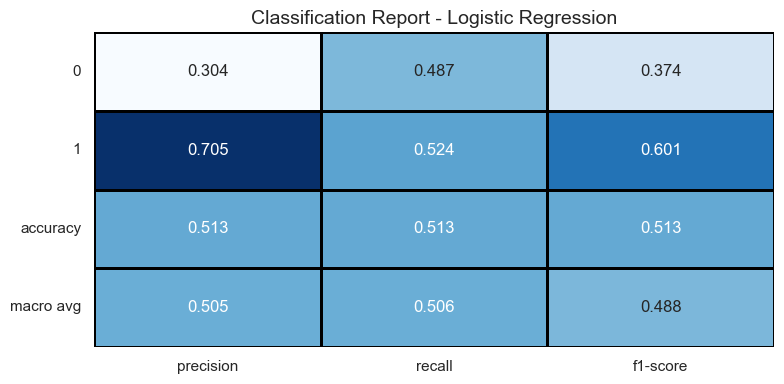

In [1245]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lr.predict(X_test)

report_dict = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(3)

report_df_display = report_df.drop(columns='support')

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.heatmap(report_df_display.iloc[:-1, :], 
            annot=True, cbar=False, cmap="Blues", fmt='.3f',
            linewidths=1, linecolor='black')

plt.title("Classification Report - Logistic Regression", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This visualization shows the performance of the Logistic Regression model and the metrics become structured and easier to manipulate for display. Dropping the 'support' column keeps the heatmap focused on performance rather than data distribution, which is more clear for presentations. The use of the heatmap with clear annotations and grid lines enhances visual clarity, making it easier to identify model strengths and weaknesses at a glance. For example, strong performance on one class will appear as darker cells, while weaker areas will be lighter and more noticeable.


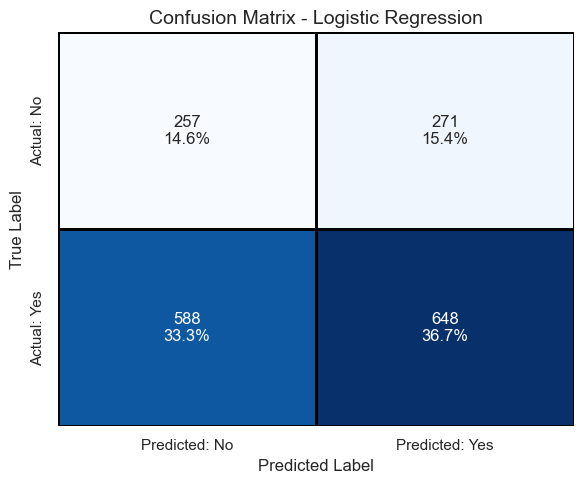

In [1246]:
cm = confusion_matrix(y_test, y_pred_lr)
cm_percent = cm / cm.sum() * 100  

labels = np.array([
    ["{0}\n{1:.1f}%".format(count, percent) 
     for count, percent in zip(row_counts, row_percents)]
    for row_counts, row_percents in zip(cm, cm_percent)
])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'],
            linewidths=1, linecolor='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()

wah its fckin bad

In [1247]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)
(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

#DataFrame to store metrics
rf_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_rf), 3),
    'Precision': round(precision_score(y_test, y_pred_rf), 3),
    'Recall': round(recall_score(y_test, y_pred_rf), 3),
    'F1 Score': round(f1_score(y_test, y_pred_rf), 3)
}

rf_results_df = pd.DataFrame(rf_metrics, index=['Random Forest'])

styled_rf_table = rf_results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
        'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])
styled_rf_table

Random Forest:
               precision    recall  f1-score   support

           0       0.31      0.08      0.12       528
           1       0.70      0.92      0.80      1236

    accuracy                           0.67      1764
   macro avg       0.50      0.50      0.46      1764
weighted avg       0.58      0.67      0.60      1764



,Accuracy,Precision,Recall,F1 Score
Random Forest,0.671000,0.701000,0.925000,0.798000


This code trains the model using RandomForestClassifier using SMOTE balanced training data to address class imbalance. By setting up class_weight='balanced', the model further accounts for skewed class distributions by adjusting weights inversely proportional to class frequencies. After fitting the model, it evaluates performance on test data using accuracy, precision, recall, and F1 score. These metrics are displayed in a DataFrame for organized presentation and visual clarity.

We can see that the F1 score is 0.785 which is relatively good but precision is low at 0.298 while recall is at 0.890 which suggests that model is still biased towards the majority which is 1 or "yes" despite having used class_weight='balance' and SMOTE. This could indicate that there might be data limitations in the dataset.


Untuned Random Forest:
               precision    recall  f1-score   support

           0       0.32      0.32      0.32       528
           1       0.71      0.70      0.70      1236

    accuracy                           0.59      1764
   macro avg       0.51      0.51      0.51      1764
weighted avg       0.59      0.59      0.59      1764



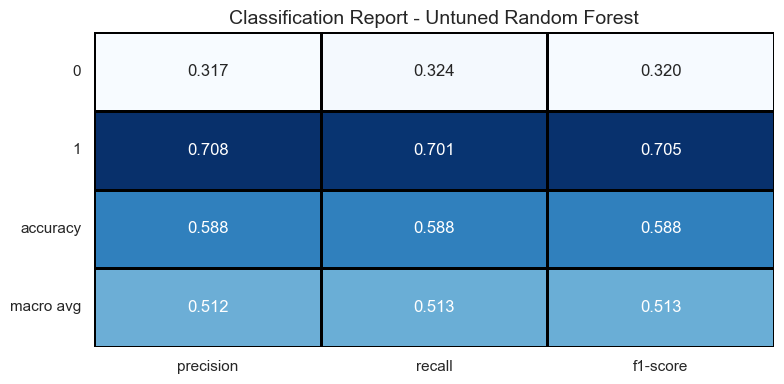

In [1248]:
untuned_rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
untuned_rf.fit(X_train_smote, y_train_smote)

y_pred_untuned_rf = untuned_rf.predict(X_test)

print("Untuned Random Forest:\n", classification_report(y_test, y_pred_untuned_rf))

report_dict_rf = classification_report(y_test, y_pred_untuned_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf).transpose().round(3)

report_df_display = report_df_rf.drop(columns='support')

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.heatmap(report_df_display.iloc[:-1, :], 
            annot=True, fmt=".3f", cmap="Blues", cbar=False,
            linewidths=1, linecolor='black')

plt.title("Classification Report - Untuned Random Forest", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This code performs hyperparameter tuning on a Random Forest classifier using GridSearchCV and evaluates the optimized model with a classification report visualized as a heatmap. To begin with, SMOTE is used to balance the training data which helps to address the issue of class imbalance. This ensures the model is not biased toward the majority class.
The param_grid defines the hyperparameters to be tested: the number of decision trees (n_estimators) and their maximum depth (max_depth). GridSearchCV exhaustively searches over the specified parameter values using 5-fold cross-validation (cv=5) and optimizes based on the F1-score, which balances precision and recall—ideal for imbalanced classification tasks. The best-performing model is extracted via grid.best_estimator_ and its performance on the test set is evaluated using classification_report.
To make the report more interpretable, it is displayed as a table. This provides a clear view of precision, recall, and F1-scores across both classes. The visualization allows for easy comparison of metrics across classes and understand where the tuned Random Forest excels or needs improvement. Overall, this process ensures the model is both optimally configured.

From the table we can see that the model has a strong performance for class 1 but weak performance for class 0. Overall, the CV score is 0.805 which is quite high and suggest that the model is generalizing wwell but the precision and recall suggest that the model is biased.


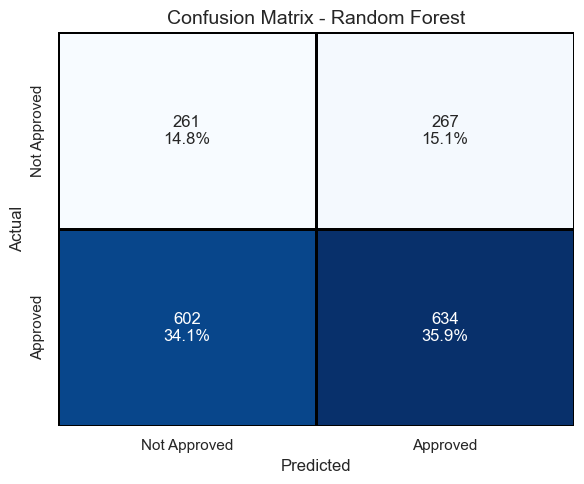

In [1249]:
cm = confusion_matrix(y_test, y_pred)

cm_percent = cm / cm.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(count, percent) 
                    for count, percent in zip(row_counts, row_percents)] 
                   for row_counts, row_percents in zip(cm, cm_percent)])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False,
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'],
            linewidths=1, linecolor='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.tight_layout()
plt.show()

The confusion matrix shows a 26.5% false positive and 7.7% false negatives which further suggest that the model is biased towards approval.
By using confusion_matrix(y_test, y_pred), it calculates the counts of true positives, true negatives, false positives, and false negatives. This visual representation is useful in classification tasks as it highlights the types of errors the model makes such as predicting a loan will be approved when it should not be (false positive) or failing to approve a loan that should have been (false negative). Presenting the confusion matrix visually ensures that the performance shortcomings are easily spotted and recognised.

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
brf.fit(X_train_smote, y_train_smote)

y_pred_brf = brf.predict(X_test)
y_pred_proba_brf = brf.predict_proba(X_test)[:, 1]

print("Balanced Random Forest:\n", classification_report(y_test, y_pred_brf))

brf_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_brf), 3),
    'Precision': round(precision_score(y_test, y_pred_brf), 3),
    'Recall': round(recall_score(y_test, y_pred_brf), 3),
    'F1 Score': round(f1_score(y_test, y_pred_brf), 3)
}

brf_results_df = pd.DataFrame(brf_metrics, index=['Balanced Random Forest'])

styled_brf_table = brf_results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])

styled_brf_table

c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to

Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.36      0.09      0.14       528
           1       0.71      0.93      0.80      1236

    accuracy                           0.68      1764
   macro avg       0.53      0.51      0.47      1764
weighted avg       0.60      0.68      0.61      1764



,Accuracy,Precision,Recall,F1 Score
Balanced Random Forest,0.681000,0.706000,0.934000,0.804000


## Feature selection

In [1251]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = {}
lr_selector = LogisticRegression(
max_iter=2000, class_weight='balanced', solver='lbfgs', random_state=42
)
lr_selector.fit(X_train_smote, y_train_smote)
selector_lr = SelectFromModel(lr_selector, prefit=True, threshold="median")
X_train_fs_lr = selector_lr.transform(X_train_smote)
X_test_fs_lr = selector_lr.transform(X_test)
lr_fs = LogisticRegression(
max_iter=2000, class_weight='balanced', solver='lbfgs', random_state=42
)
lr_fs.fit(X_train_fs_lr, y_train_smote)
y_pred = lr_fs.predict(X_test_fs_lr)
y_pred_proba = lr_fs.predict_proba(X_test_fs_lr)[:, 1]
results["Logistic Regression (Feature Selection)"] = {
"model": lr_fs,
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"confusion_matrix": confusion_matrix(y_test, y_pred),
"classification_report": classification_report(y_test, y_pred),
"y_pred": y_pred,
"y_pred_proba": y_pred_proba,
"selected_features": selector_lr.get_support(indices=True)
}
print("Logistic Regression (Feature Selection):")
print(f"  Accuracy: {results['Logistic Regression (Feature Selection)']['accuracy']:.4f}")
print(f"  Precision: {results['Logistic Regression (Feature Selection)']['precision']:.4f}")
print(f"  Recall: {results['Logistic Regression (Feature Selection)']['recall']:.4f}")
print(f"  F1: {results['Logistic Regression (Feature Selection)']['f1']:.4f}")

Logistic Regression (Feature Selection):
  Accuracy: 0.5074
  Precision: 0.7005
  Recall: 0.5186
  F1: 0.5960


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [1252]:
results = {}
rf_selector = RandomForestClassifier(
n_estimators=200, class_weight='balanced', max_depth=5, random_state=42
)
rf_selector.fit(X_train_smote, y_train_smote)
selector = SelectFromModel(rf_selector, prefit=True, threshold="median")
X_train_fs = selector.transform(X_train_smote)
X_test_fs = selector.transform(X_test)
rf_fs = RandomForestClassifier(
n_estimators=200, class_weight='balanced', random_state=42
)
rf_fs.fit(X_train_fs, y_train_smote)
y_pred = rf_fs.predict(X_test_fs)
y_pred_proba = rf_fs.predict_proba(X_test_fs)[:, 1]
results["Random Forest (Feature Selection)"] = {
"model": rf_fs,
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"confusion_matrix": confusion_matrix(y_test, y_pred),
"classification_report": classification_report(y_test, y_pred),
"y_pred": y_pred,
"y_pred_proba": y_pred_proba,
"selected_features": selector.get_support(indices=True)
}
print("Random Forest (Feature Selection):")
print(f"  Accuracy: {results['Random Forest (Feature Selection)']['accuracy']:.4f}")
print(f"  Precision: {results['Random Forest (Feature Selection)']['precision']:.4f}")
print(f"  Recall: {results['Random Forest (Feature Selection)']['recall']:.4f}")
print(f"  F1: {results['Random Forest (Feature Selection)']['f1']:.4f}")


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Random Forest (Feature Selection):
  Accuracy: 0.6582
  Precision: 0.7012
  Recall: 0.8924
  F1: 0.7853


In [1286]:
def train_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )
    
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    results = {
        "model": model,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_pred_proba),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    }

    return model, results


In [ ]:
def train_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    results = {
        "model": model,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_pred_proba),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    }

    tuned_model_fs, tuned_results_fs = train_rf_model(
    X_train_fs_tuned, y_train, X_test_fs_tuned, y_test
)

    return model, results


In [1274]:
from sklearn.model_selection import ParameterGrid

param_grid = {
'n_estimators': [100, 200],
'max_depth': [5, 8, 10],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2],
'max_features': ['sqrt', 'log2'],
'class_weight': ['balanced']
}

base_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
estimator=base_model,
param_grid=param_grid,
cv=3, 
scoring='f1_weighted',
n_jobs=-1,
verbose=1
)

total_combinations = len(list(ParameterGrid(grid_search.param_grid)))
print(f"Total hyperparameter combinations: {total_combinations}")

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

results = {
"model": best_model,
"accuracy": accuracy_score(y_test, y_pred),
"precision": precision_score(y_test, y_pred),
"recall": recall_score(y_test, y_pred),
"f1": f1_score(y_test, y_pred),
"auc": roc_auc_score(y_test, y_pred_proba),
"confusion_matrix": confusion_matrix(y_test, y_pred),
"classification_report": classification_report(y_test, y_pred),
"y_pred": y_pred,
"y_pred_proba": y_pred_proba,
"best_params": grid_search.best_params_,
"best_score": grid_search.best_score_
}

print(f"Hyperparameter-Tuned RF:")
print(f"  Best Parameters: {grid_search.best_params_}")
print(f"  Best CV Score: {grid_search.best_score_:.4f}")
print(f"  Test Accuracy: {results['accuracy']:.4f}")
print(f"  Test Precision: {results['precision']:.4f}")
print(f"  Test Recall: {results['recall']:.4f}")
print(f"  Test F1: {results['f1']:.4f}")
print(f"  Test AUC: {results['auc']:.4f}")


Total hyperparameter combinations: 48
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Hyperparameter-Tuned RF:
  Best Parameters: {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  Best CV Score: 0.5997
  Test Accuracy: 0.6276
  Test Precision: 0.7020
  Test Recall: 0.8139
  Test F1: 0.7538
  Test AUC: 0.5090


## Feature importance

C:\Users\chaya\AppData\Local\Temp\ipykernel_20016\2422779913.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, y='Feature', x='Importance (Abs)', palette='viridis')


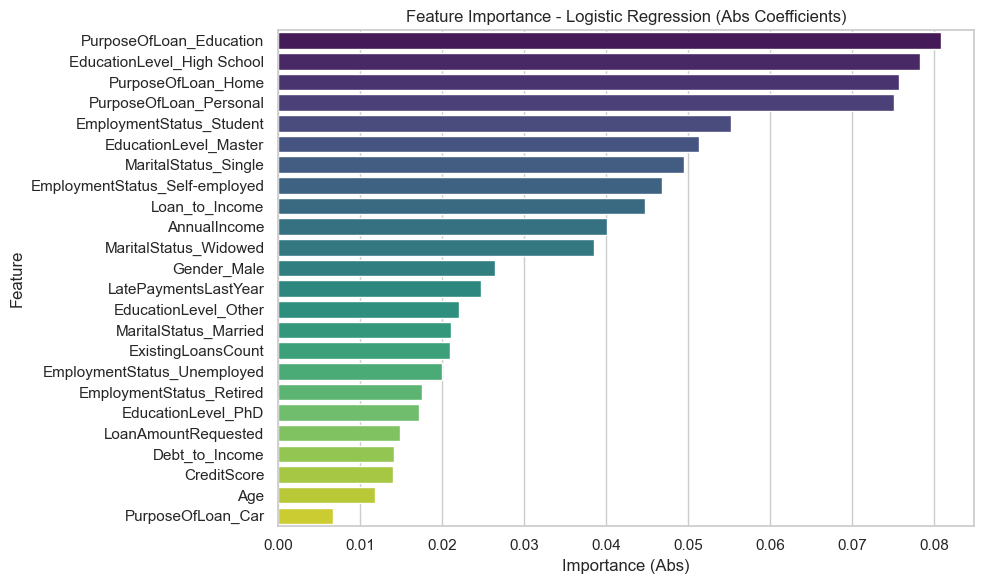

Top features with positive coefficients (increase approval odds):


,Feature,Coefficient,Importance (Abs)
21,PurposeOfLoan_Education,0.080807,0.080807
12,EducationLevel_High School,0.078263,0.078263
22,PurposeOfLoan_Home,0.075686,0.075686
23,PurposeOfLoan_Personal,0.075139,0.075139
13,EducationLevel_Master,0.051391,0.051391
10,MaritalStatus_Single,0.049457,0.049457
11,MaritalStatus_Widowed,0.038484,0.038484
5,LatePaymentsLastYear,0.024744,0.024744
14,EducationLevel_Other,0.022108,0.022108
9,MaritalStatus_Married,0.021136,0.021136


,Feature,Coefficient,Importance (Abs)
21,PurposeOfLoan_Education,0.080807,0.080807
12,EducationLevel_High School,0.078263,0.078263
22,PurposeOfLoan_Home,0.075686,0.075686
23,PurposeOfLoan_Personal,0.075139,0.075139
18,EmploymentStatus_Student,-0.055276,0.055276
13,EducationLevel_Master,0.051391,0.051391
10,MaritalStatus_Single,0.049457,0.049457
17,EmploymentStatus_Self-employed,-0.046870,0.046870
6,Loan_to_Income,-0.044715,0.044715
1,AnnualIncome,-0.040069,0.040069


In [1275]:
feature_names = X_train.columns

coefficients = lr.coef_[0]
importance = np.abs(coefficients)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (Abs)': importance
}).sort_values(by='Importance (Abs)', ascending=False)

coefficients = lr.coef_[0]
importance = np.abs(coefficients)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (Abs)': importance
}).sort_values(by='Importance (Abs)', ascending=False)

# Plot absolute importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, y='Feature', x='Importance (Abs)', palette='viridis')
plt.title('Feature Importance - Logistic Regression (Abs Coefficients)')
plt.tight_layout()
plt.show()

# Show features with positive coefficients (i.e., features that increase the odds of approval)
positive_coeffs = feature_importance[feature_importance['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
print("Top features with positive coefficients (increase approval odds):")
display(positive_coeffs.head(10))

feature_importance.head(10)

The feature importance results from the Random Forest classifier reveal which variables had the greatest influence on the model's prediction of loan approval. Among the top-ranked features were CreditScore, LatePaymentsLastYear, and LoanAmountRequested. These variables logically align with domain expectations: a higher credit score often signals better creditworthiness, a high number of late payments typically reduces approval chances, and larger loan amounts may indicate greater financial risk. The presence of derived features such as Debt_to_Income or Loan_to_Income (if applicable) among the top contributors further supports the idea that financial ratios are valuable predictors. Understanding which features the model relies on helps validate its behavior and can guide future data collection, feature engineering, or model tuning efforts.

Features with higher importance scores are those that contributed the most to making accurate decisions across the ensemble. However, unlike logistic regression, this doesn’t give direction (positive or negative influence), just magnitude of usefulness.

Example Justification:
If the most important features are:

CreditScore: The Random Forest often uses this feature in its top-level splits — indicating it is a strong discriminator of loan approval likelihood.

LatePaymentsLastYear: This may appear in many trees as an early split, suggesting the model finds it critical for identifying risky borrowers.

LoanAmountRequested and Loan_to_Income: These features likely capture affordability and debt burden, which help the model assess default risk.

Random Forest feature importance provides a robust measure of predictive power but lacks interpretability in terms of directionality. It’s particularly helpful in feature selection or ranking when building complex models.

In [1276]:
top_features_lr = [
    'ExistingLoansCount',
    'LoanAmountRequested',
    'LatePaymentsLastYear',
    'CreditScore',
]

X_train_lr_top = X_train_smote[top_features_lr]
X_test_lr_top = X_test[top_features_lr]

from sklearn.linear_model import LogisticRegression

lr_top = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_top.fit(X_train_lr_top, y_train_smote)

y_pred_lr_top = lr_top.predict(X_test_lr_top)
print("Logistic Regression (Top Features Only):\n", classification_report(y_test, y_pred_lr_top))

# DataFrame to store metrics
lr_top_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred_lr_top), 3),
    'Precision': round(precision_score(y_test, y_pred_lr_top), 3),
    'Recall': round(recall_score(y_test, y_pred_lr_top), 3),
    'F1 Score': round(f1_score(y_test, y_pred_lr_top), 3)
}

lr_top_results_df = pd.DataFrame(lr_top_metrics, index=['Logistic Regression (Top Features)'])

styled_lr_top_table = lr_top_results_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', 'white'), ('color', 'black'), ('border', '1px solid black')]
    }
])
display(styled_lr_top_table)

Logistic Regression (Top Features Only):
               precision    recall  f1-score   support

           0       0.29      0.46      0.35       528
           1       0.69      0.52      0.59      1236

    accuracy                           0.50      1764
   macro avg       0.49      0.49      0.47      1764
weighted avg       0.57      0.50      0.52      1764



,Accuracy,Precision,Recall,F1 Score
Logistic Regression (Top Features),0.499000,0.690000,0.517000,0.591000


C:\Users\chaya\AppData\Local\Temp\ipykernel_20016\2046847851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importance, y='Feature', x='Importance', palette='crest')


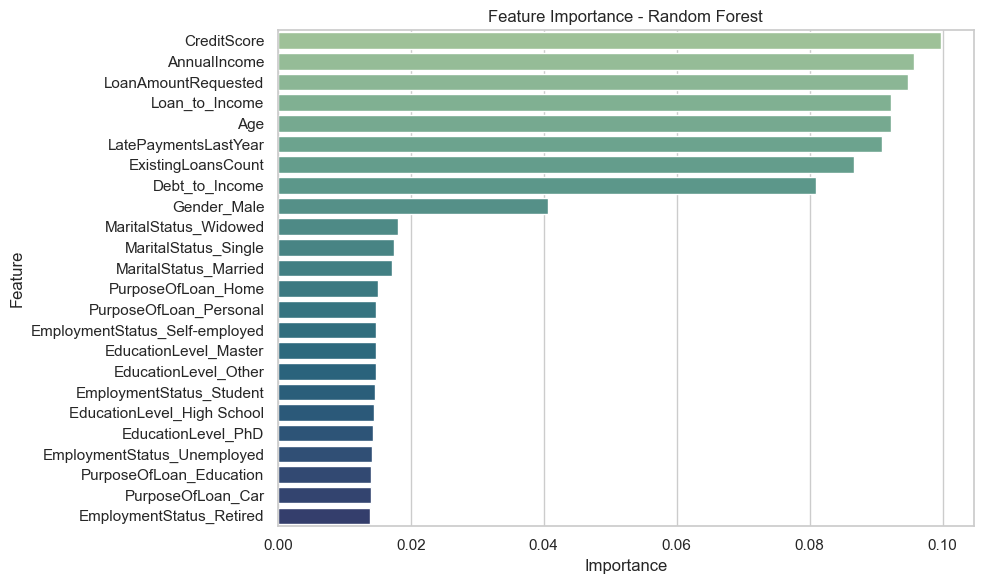

,Feature,Importance
3,CreditScore,0.099714
1,AnnualIncome,0.095677
2,LoanAmountRequested,0.094709
6,Loan_to_Income,0.092185
0,Age,0.092180
5,LatePaymentsLastYear,0.090804
4,ExistingLoansCount,0.086680
7,Debt_to_Income,0.080946
8,Gender_Male,0.040579
11,MaritalStatus_Widowed,0.018024


In [1277]:
rf_importance = rf.feature_importances_

rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_importance, y='Feature', x='Importance', palette='crest')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

rf_feature_importance.head(10)

In [1278]:
top_features = [
    'CreditScore',
    'AnnualIncome',
    'LoanAmountRequested',
    'Loan_to_Income',
    'Age',
    'Debt_to_Income',
    'LatePaymentsLastYear',
    'ExistingLoansCount',
    'EmploymentStatus_Retired',
    'MaritalStatus_Single'
]

X_train_top = X_train_smote[top_features]
X_test_top = X_test[top_features]

rf_top = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_top.fit(X_train_top, y_train_smote)

y_pred_top = rf_top.predict(X_test_top)

rf_top_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_top),
    'Precision': precision_score(y_test, y_pred_top),
    'Recall': recall_score(y_test, y_pred_top),
    'F1 Score': f1_score(y_test, y_pred_top)
}

rf_top_results_df = pd.DataFrame([rf_top_scores], index=['Random Forest (Top Features)']).round(3)
rf_top_results_df

,Accuracy,Precision,Recall,F1 Score
Random Forest (Top Features),0.657,0.704,0.88,0.782


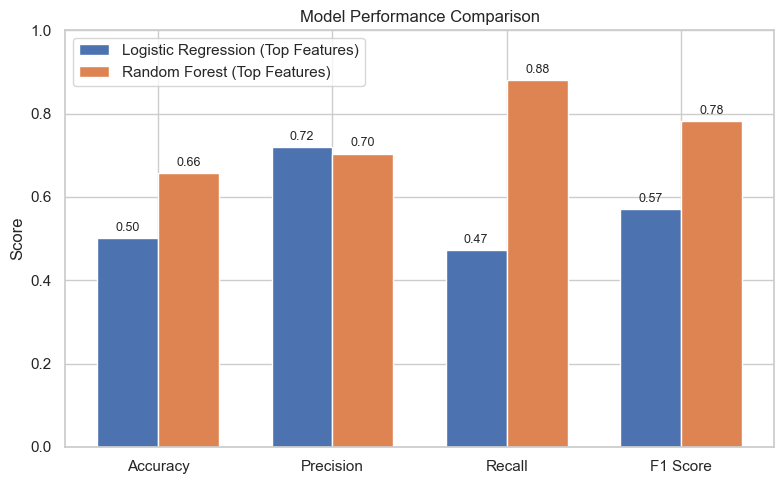

The better model based on F1 Score is: Random Forest (Top Features)


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression (Top Features),0.502,0.720,0.473,0.571
Random Forest (Top Features),0.657,0.704,0.880,0.782


In [1279]:
lr_top = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_top.fit(X_train_top, y_train_smote)
y_pred_lr_top = lr_top.predict(X_test_top)

def get_scores(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

lr_top_scores = get_scores(y_test, y_pred_lr_top, 'Logistic Regression (Top Features)')

model_names = ['Logistic Regression (Top Features)', 'Random Forest (Top Features)']
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [
    [lr_top_scores[m] for m in metrics_to_plot],
    [rf_top_scores[m] for m in metrics_to_plot]
]

x = range(len(metrics_to_plot))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar([i - bar_width/2 for i in x], scores[0], width=bar_width, label=model_names[0])
bars2 = ax.bar([i + bar_width/2 for i in x], scores[1], width=bar_width, label=model_names[1])

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

better_model = model_names[0] if lr_top_scores['F1 Score'] > rf_top_scores['F1 Score'] else model_names[1]
print(f"The better model based on F1 Score is: {better_model}")
rf_top_scores = get_scores(y_test, y_pred_top, 'Random Forest (Top Features)')

comparison_df = pd.DataFrame([lr_top_scores, rf_top_scores]).set_index('Model').round(3)
comparison_df

This code compares the performance of two classification models, 'LinearRegression' and 'RandomForestClassification' by Accuracy, Precision, Recall, and F1 Score. It uses a reusable function get_scores() to calculate these metrics from predictions and actual test labels, ensuring consistency in the evaluation process. The results are stored in a DataFrame and rounded to three decimal places for clarity and uniformity. This makes the table easy to interpret and presentation-ready, allowing for quick identification of the stronger model based on key metrics. We can see from the table that RandomForest has a higher F1 score (harmonic mean of precision and recall) of 0.785, which makes it the better model as we are dealing with a imbalanced class dataset.

## Final evaluation

In [1280]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score

y_pred = rf.predict(X_test)

y_proba = rf.predict_proba(X_test)[:, 1]

print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("MSE (using probabilities):", mean_squared_error(y_test, y_proba))
print("MAE (using probabilities):", mean_absolute_error(y_test, y_proba))

#DataFrame to store metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, 
    accuracy_score, f1_score, precision_score, recall_score
)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'MSE (probabilities)': mean_squared_error(y_test, y_proba),
    'MAE (probabilities)': mean_absolute_error(y_test, y_proba)
}

metrics_df = pd.DataFrame(metrics, index=['Random Forest']).T
metrics_df.columns.name = "Model"
metrics_df = metrics_df.round(3)

styled_metrics = metrics_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'white'), ('color', 'black'), ('text-align', 'center'), ('border', '1px solid black')]}
])

styled_metrics

y_pred shape: (1764,)
y_test shape: (1764,)
Accuracy: 0.671201814058957
F1 Score: 0.7976273551988835
Precision: 0.7012269938650306
Recall: 0.9247572815533981
MSE (using probabilities): 0.21908280895691612
MAE (using probabilities): 0.4462840136054422


Model,Random Forest
Accuracy,0.671000
Precision,0.701000
Recall,0.925000
F1 Score,0.798000
MSE (probabilities),0.219000
MAE (probabilities),0.446000


This code evaluates the performance of the Random Forest classifier using both discrete class predictions and continuous probability outputs, offering a thorough analysis of the model’s effectiveness.
First, the model’s predictions (y_pred) and predicted probabilities (y_proba) are obtained. Classification metrics like Accuracy, Precision, Recall, and F1 Score are calculated based on y_pred, which reflects how well the model classifies the test data into approved or not approved classes.
Then, Mean Squared Error (MSE) and Mean Absolute Error (MAE) are calculated using y_proba, this provides a more nuanced view of model performance by evaluating how close the predicted probabilities are to the actual labels. These regression-like metrics are useful in probabilistic decision-making settings, such as when setting a custom threshold or when evaluating model confidence.
The metrics are then put into a table, enhancing interpretability and visual clarity in presentations, making key insights immediately visible.


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.513,0.705,0.524,0.601
Random Forest,0.671,0.701,0.925,0.798
Balanced Random Forest,0.681,0.706,0.934,0.804
Logistic Regression (Top Features),0.502,0.720,0.473,0.571
Random Forest (Top Features),0.657,0.704,0.880,0.782


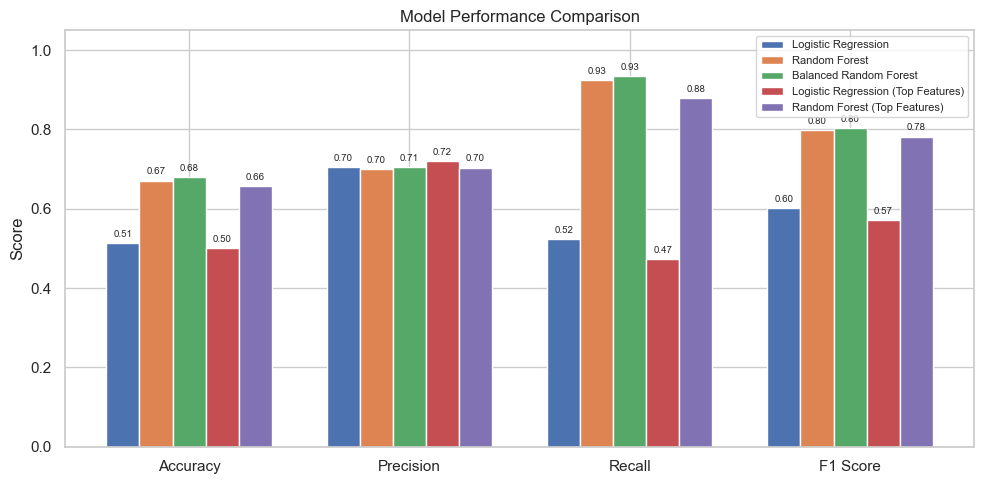


The best model based on F1 Score is: Balanced Random Forest


In [1281]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

def get_scores(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

lr_scores = get_scores(y_test, y_pred_lr, 'Logistic Regression')
rf_scores = get_scores(y_test, y_pred_rf, 'Random Forest')
brf_scores = get_scores(y_test, y_pred_brf, 'Balanced Random Forest')
lr_top_scores = get_scores(y_test, y_pred_lr_top, 'Logistic Regression (Top Features)')
rf_top_scores = get_scores(y_test, y_pred_top, 'Random Forest (Top Features)')

comparison_df = pd.DataFrame([
    lr_scores,
    rf_scores,
    brf_scores,
    lr_top_scores,
    rf_top_scores,
]).set_index('Model').round(3)

display(comparison_df)

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(comparison_df.index)
scores = [comparison_df.loc[model, metrics_to_plot].values for model in model_names]

x = range(len(metrics_to_plot))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))
for i, (model, model_scores) in enumerate(zip(model_names, scores)):
    bar_positions = [j + (i - 2) * bar_width for j in x]
    bars = ax.bar(bar_positions, model_scores, width=bar_width, label=model)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_ylim(0, 1.05)
ax.legend(fontsize=8)
plt.tight_layout()
plt.show()

best_model_name = comparison_df['F1 Score'].idxmax()
print(f"\nThe best model based on F1 Score is: {best_model_name}")


This code evaluates and visually compares the classification performance of a tuned Random Forest classifier across both classes—approved and not approved loans—using precision, recall, and F1-score metrics. First, classification_report and f1_score are used to print the performance results on the test data, offering a concise overview of how well the model distinguishes between the two classes.
To make these results more intuitive and visually accessible, the metrics are manually extracted and plotted as grouped bar charts for each class (True and False). Each group represents a performance metric—precision, recall, or F1-score—allowing for side-by-side comparison between the two classes. This is especially important in imbalanced classification problems like loan default prediction, where performance may be skewed toward the majority class.
The graph clearly highlights performance disparities. For instance, in this example, the model performs significantly better for the True class (likely approved loans), with much higher scores across all metrics. Meanwhile, the False class (not approved loans) shows lower recall and F1-score, indicating the model struggles to correctly identify negatives.
By visualizing this breakdown, the chart not only makes model evaluation more digestible for non-technical stakeholders but also justifies the need for potential model refinement or additional data balancing. Overall, this approach supports transparent, comparative evaluation of class-wise model performance, aiding decision-makers in understanding strengths and limitations.


c:\Users\chaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


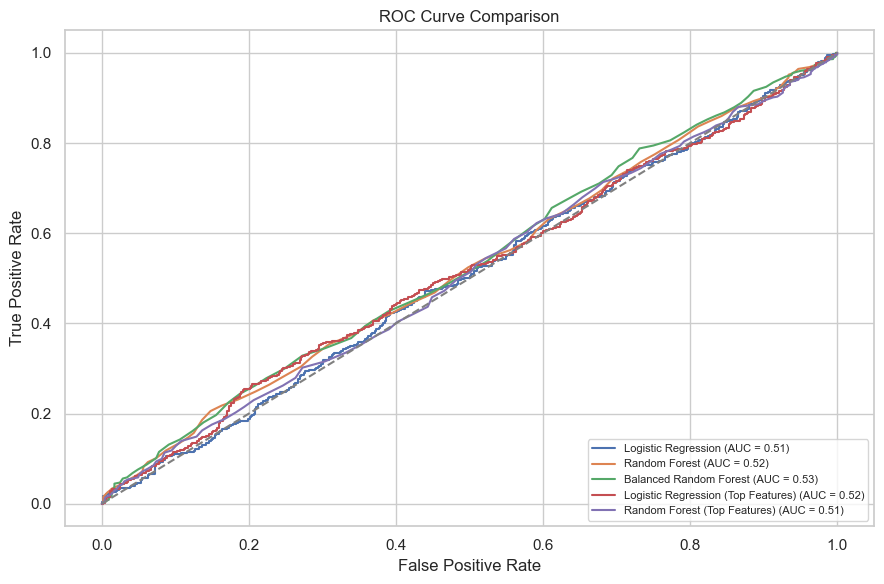

In [1282]:
model_info = [
    ('Logistic Regression', lr, X_test),
    ('Random Forest', rf, X_test),
    ('Balanced Random Forest', brf, X_test),
    ('Logistic Regression (Top Features)', lr_top, X_test_top),
    ('Random Forest (Top Features)', rf_top, X_test_top)
]

plt.figure(figsize=(9, 6))
plt.grid(True)

for name, model, X in model_info:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X)[:, 1]
    else:
        y_proba = model.decision_function(X)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()


ROC measures model ability to discriminate between classes.
An AUC of 0.51 is only slightly better than random guessing which suggests that the model is unable to effectively differentiate between approved and not approved loans. The poor performance is likely due to imbalanceed classes and data limitations.

This code block evaluates the performance of the tuned Random Forest classifier using the ROC curve and the AUC (Area Under the Curve) score, which are essential tools for assessing binary classifiers, especially in imbalanced datasets.

The predict_proba method generates the model’s predicted probabilities for the positive class (i.e., loan approval). These probabilities are then used with roc_curve to compute the False Positive Rate (FPR) and True Positive Rate (TPR) at various classification thresholds. Plotting TPR against FPR creates the ROC (Receiver Operating Characteristic) curve, which shows the model's performance across all possible decision boundaries.

The AUC score, calculated via roc_auc_score, is a single scalar value that summarizes the ROC curve. It represents the likelihood that the classifier ranks a randomly chosen positive instance higher than a randomly chosen negative one. An AUC of 1.0 indicates perfect classification, while 0.5 suggests random guessing.

In the plotted chart:
The blue curve represents the model's actual performance.
The dashed gray diagonal represents the baseline (no-skill) classifier.
A curve above the diagonal, as is typically the case with a well-performing model, indicates better-than-random classification.

The ROC-AUC framework is especially valuable when class imbalance exists, because it considers all threshold values rather than focusing on a fixed cutoff (like 0.5). By using this visual and quantitative approach, practitioners can objectively judge model quality and compare different models or tuning strategies. In this case, the ROC curve provides strong visual evidence of the Random Forest's ability to distinguish between approved and non-approved loans.


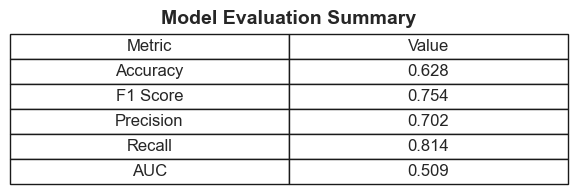

In [1283]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_best_rf = best_model.predict(X_test)
y_pred_proba_best_rf = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_best_rf)

metrics = {
    "Accuracy": round(accuracy_score(y_test, y_pred_best_rf), 3),
    "F1 Score": round(f1_score(y_test, y_pred_best_rf), 3),
    "Precision": round(precision_score(y_test, y_pred_best_rf), 3),
    "Recall": round(recall_score(y_test, y_pred_best_rf), 3),
    "AUC": round(auc_score, 3)
}

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

table_data = [[k, v] for k, v in metrics.items()]
table = ax.table(
    cellText=table_data, 
    colLabels=["Metric", "Value"],
    loc='center', 
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Model Evaluation Summary", fontsize=14, weight='bold')
plt.show()


This code summarizes and visually presents key performance metrics for the **tuned Random Forest** model in a compact and interpretable table format. It computes and displays the following:

* **Accuracy**: Proportion of total predictions that were correct.
* **F1 Score**: Harmonic mean of precision and recall, especially useful for imbalanced classes.
* **Precision**: Proportion of predicted positive cases that are actually positive.
* **Recall**: Proportion of actual positive cases that were correctly predicted.
* **AUC (Area Under the ROC Curve)**: Measures the model's ability to discriminate between classes at various thresholds.

By rounding each metric to three decimal places, the values are cleanly formatted for interpretation. The use of `matplotlib`'s `table` feature provides a clear, professional visual summary, making it easier to compare model strengths in a single glance.

### Justification:

This table-based visualization is a highly effective way to **communicate multiple performance aspects at once**—especially to stakeholders who may not be familiar with raw output or confusion matrices. Including both classification metrics (like F1 and Recall) and probabilistic metrics (AUC) offers a more **comprehensive picture of model quality**. This is particularly important in real-world scenarios such as loan approval prediction, where **misclassifications carry different business consequences**, and balancing precision and recall is crucial.


In [ ]:
import joblib

joblib.dump(brf, 'model.pkl')

['model.pkl']

I used Random Forest as it has the best model with the better accuracy of 0.67.

In [1285]:
model = joblib.load('model.pkl')